<a href="https://colab.research.google.com/github/RenatoSMacedo/Challenge_Telecom_X_Br_Parte2/blob/main/Challenge_Telecom_X_Br_Parte02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Carregando a base
df = pd.read_csv('/content/TelecomX_Data.csv')

# Visualizando as primeiras linhas
df.head()

ID_Cliente  Evasao  Genero  Idoso  Possui_Parceiro  Possui_Dependentes  \
0  0002-ORFBO       0  Female      0                1                   1   
1  0003-MKNFE       0    Male      0                0                   0   
2  0004-TLHLJ       1    Male      0                0                   0   
3  0011-IGKFF       1    Male      1                1                   0   
4  0013-EXCHZ       1  Female      1                1                   0   

   Meses_Contrato  Servico_Telefone  Multiplas_Linhas Tipo_Internet  ...  \
0               9                 1                 0           DSL  ...   
1               9                 1                 1           DSL  ...   
2               4                 1                 0   Fiber optic  ...   
3              13                 1                 0   Fiber optic  ...   
4               3                 1                 0   Fiber optic  ...   

   Streaming_TV  Streaming_Filmes   Tipo_Contrato  Fatura_Papel  \
0             1                 0        One year             1   
1             0                 1  Month-to-month             0   
2             0                 0  Month-to-month             1   
3             1                 1  Month-to-month             1   
4             1                 0  Month-to-month             1   

    Forma_Pagamento  Gastos_Mensais Gastos_Totais  Contas_Diarias  \
0      Mailed check            65.6        593.30        2.186667   
1      Mailed check            59.9        542.40        1.996667   
2  Electronic check            73.9        280.85        2.463333   
3  Electronic check            98.0       1237.85        3.266667   
4      Mailed check            83.9        267.40        2.796667   

  Qtd_Servicos  Tem_Internet  
0            3          True  
1            1          True  
2            1          True  
3            4          True  
4            2          True  

[5 rows x 24 columns]

In [20]:
# Remover colunas irrelevantes para a an√°lise
df.drop(columns=['ID_Cliente'], inplace=True)
df.drop(columns=['Tem_Internet'], inplace=True)
df.drop(columns=['Qtd_Servicos'], inplace=True)

In [21]:
# Verifica tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Evasao                7032 non-null   int64  
 1   Genero                7032 non-null   object 
 2   Idoso                 7032 non-null   int64  
 3   Possui_Parceiro       7032 non-null   int64  
 4   Possui_Dependentes    7032 non-null   int64  
 5   Meses_Contrato        7032 non-null   int64  
 6   Servico_Telefone      7032 non-null   int64  
 7   Multiplas_Linhas      7032 non-null   int64  
 8   Tipo_Internet         7032 non-null   object 
 9   Seguranca_Online      7032 non-null   int64  
 10  Backup_Online         7032 non-null   int64  
 11  Protecao_Dispositivo  7032 non-null   int64  
 12  Suporte_Tecnico       7032 non-null   int64  
 13  Streaming_TV          7032 non-null   int64  
 14  Streaming_Filmes      7032 non-null   int64  
 15  Tipo_Contrato        

In [22]:
# One-hot encoding nas colunas categ√≥ricas
colunas_categoricas = ['Genero', 'Tipo_Internet', 'Tipo_Contrato', 'Forma_Pagamento']
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

In [23]:
df_encoded.head()

Evasao  Idoso  Possui_Parceiro  Possui_Dependentes  Meses_Contrato  \
0       0      0                1                   1               9   
1       0      0                0                   0               9   
2       1      0                0                   0               4   
3       1      1                1                   0              13   
4       1      1                1                   0               3   

   Servico_Telefone  Multiplas_Linhas  Seguranca_Online  Backup_Online  \
0                 1                 0                 0              1   
1                 1                 1                 0              0   
2                 1                 0                 0              0   
3                 1                 0                 0              1   
4                 1                 0                 0              0   

   Protecao_Dispositivo  ...  Gastos_Totais  Contas_Diarias  Genero_Male  \
0                     0  ...         593.30        2.186667        False   
1                     0  ...         542.40        1.996667         True   
2                     1  ...         280.85        2.463333         True   
3                     1  ...        1237.85        3.266667         True   
4                     0  ...         267.40        2.796667        False   

   Tipo_Internet_Fiber optic  Tipo_Internet_No  Tipo_Contrato_One year  \
0                      False             False                    True   
1                      False             False                   False   
2                       True             False                   False   
3                       True             False                   False   
4                       True             False                   False   

   Tipo_Contrato_Two year  Forma_Pagamento_Credit card (automatic)  \
0                   False                                    False   
1                   False                                    False   
2                   False                                    False   
3                   False                                    False   
4                   False                                    False   

   Forma_Pagamento_Electronic check  Forma_Pagamento_Mailed check  
0                             False                          True  
1                             False                          True  
2                              True                         False  
3                              True                         False  
4                             False                          True  

[5 rows x 25 columns]

In [24]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Evasao                                   7032 non-null   int64  
 1   Idoso                                    7032 non-null   int64  
 2   Possui_Parceiro                          7032 non-null   int64  
 3   Possui_Dependentes                       7032 non-null   int64  
 4   Meses_Contrato                           7032 non-null   int64  
 5   Servico_Telefone                         7032 non-null   int64  
 6   Multiplas_Linhas                         7032 non-null   int64  
 7   Seguranca_Online                         7032 non-null   int64  
 8   Backup_Online                            7032 non-null   int64  
 9   Protecao_Dispositivo                     7032 non-null   int64  
 10  Suporte_Tecnico                          7032 no

In [25]:
#Verificar desbalanceamento
df_encoded['Evasao'].value_counts(normalize=True).round(3)

Evasao
0    0.734
1    0.266
Name: proportion, dtype: float64

In [26]:
# Separar as vari√°veis explicativas (X) e o alvo (y)
X = df_encoded.drop('Evasao', axis=1)
y = df_encoded['Evasao']

# Aplicar o SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar a nova distribui√ß√£o da vari√°vel alvo
print("Distribui√ß√£o ap√≥s SMOTE:")
print(y_resampled.value_counts())


Distribui√ß√£o ap√≥s SMOTE:
Evasao
0    5163
1    5163
Name: count, dtype: int64


In [27]:
# Verificando a correla√ß√£o das vari√°veis com a Evas√£o
corr = df_encoded.corr()
corr['Evasao']

Evasao                                     1.000000
Idoso                                      0.150541
Possui_Parceiro                           -0.149982
Possui_Dependentes                        -0.163128
Meses_Contrato                            -0.354049
Servico_Telefone                           0.011691
Multiplas_Linhas                           0.040033
Seguranca_Online                          -0.171270
Backup_Online                             -0.082307
Protecao_Dispositivo                      -0.066193
Suporte_Tecnico                           -0.164716
Streaming_TV                               0.063254
Streaming_Filmes                           0.060860
Fatura_Papel                               0.191454
Gastos_Mensais                             0.192858
Gastos_Totais                             -0.199484
Contas_Diarias                             0.192858
Genero_Male                               -0.008545
Tipo_Internet_Fiber optic                  0.307463
Tipo_Internet_No                          -0.227578
Tipo_Contrato_One year                    -0.178225
Tipo_Contrato_Two year                    -0.301552
Forma_Pagamento_Credit card (automatic)   -0.134687
Forma_Pagamento_Electronic check           0.301455
Forma_Pagamento_Mailed check              -0.090773
Name: Evasao, dtype: float64

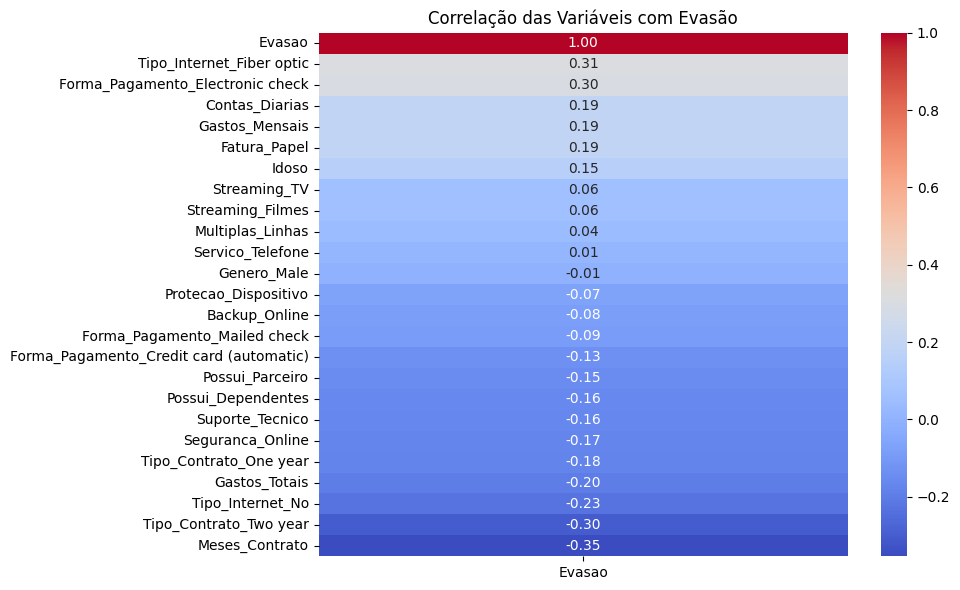

In [28]:
# Visualiza√ß√£o gr√°fica da Correla√ß√£o
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr()[['Evasao']].sort_values(by='Evasao', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correla√ß√£o das Vari√°veis com Evas√£o')
plt.tight_layout()
plt.show()

In [29]:
# Copiar os dados para n√£o alterar o original
X_resampled_scaled = X_resampled.copy()

# Define as colunas cont√≠nuas que devem ser padronizadas
colunas_continuas = ['Gastos_Mensais', 'Gastos_Totais', 'Contas_Diarias']

# Aplica o StandardScaler
scaler = StandardScaler()
X_resampled_scaled[colunas_continuas] = scaler.fit_transform(X_resampled_scaled[colunas_continuas])

/tmp/ipython-input-1645150111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasao', y='Meses_Contrato', data=df_encoded, palette='pastel')


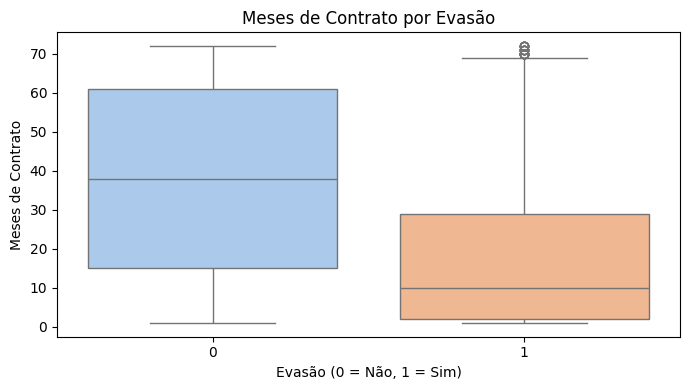

In [30]:
# Boxplot ‚Äî Meses_Contrato √ó Evasao
plt.figure(figsize=(7, 4))
sns.boxplot(x='Evasao', y='Meses_Contrato', data=df_encoded, palette='pastel')
plt.title('Meses de Contrato por Evas√£o')
plt.xlabel('Evas√£o (0 = N√£o, 1 = Sim)')
plt.ylabel('Meses de Contrato')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1992262454.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasao', y='Gastos_Totais', data=df_encoded, palette='pastel')


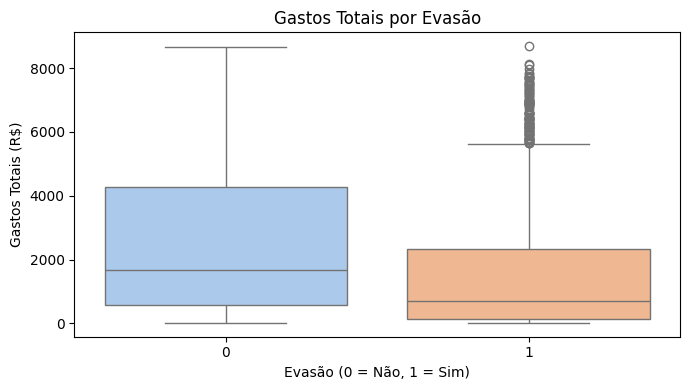

In [31]:
# Boxplot ‚Äî Gastos_Totais √ó Evasao
plt.figure(figsize=(7, 4))
sns.boxplot(x='Evasao', y='Gastos_Totais', data=df_encoded, palette='pastel')
plt.title('Gastos Totais por Evas√£o')
plt.xlabel('Evas√£o (0 = N√£o, 1 = Sim)')
plt.ylabel('Gastos Totais (R$)')
plt.tight_layout()
plt.show()

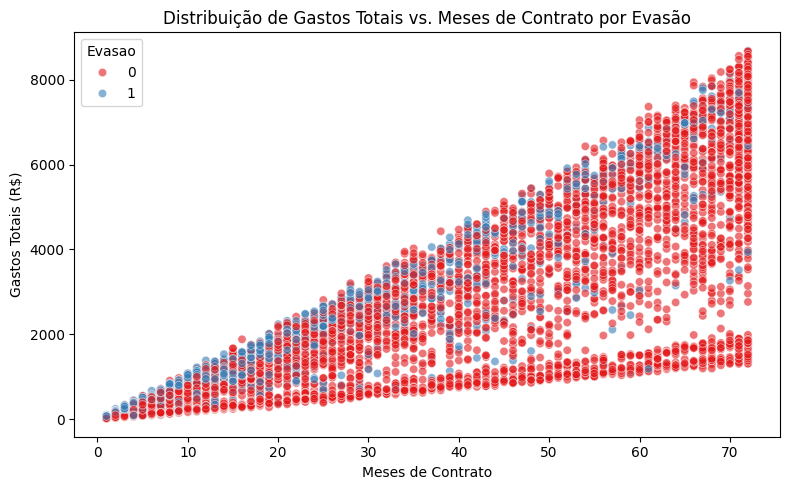

In [32]:
# Scatter Plot ‚Äî Gastos_Totais √ó Meses_Contrato com Evas√£o
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Meses_Contrato', y='Gastos_Totais', hue='Evasao', data=df_encoded, palette='Set1', alpha=0.6)
plt.title('Distribui√ß√£o de Gastos Totais vs. Meses de Contrato por Evas√£o')
plt.xlabel('Meses de Contrato')
plt.ylabel('Gastos Totais (R$)')
plt.tight_layout()
plt.show()

In [33]:
# Dividir em treino (70%) e teste (30%) usando dados balanceados pelo SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.3,
    random_state=42,
    stratify=y_resampled  # mant√©m a propor√ß√£o entre as classes ap√≥s SMOTE
)

print("Tamanho treino:", X_train.shape, y_train.shape)
print("Tamanho teste:", X_test.shape, y_test.shape)


Tamanho treino: (7228, 24) (7228,)
Tamanho teste: (3098, 24) (3098,)


In [34]:
# ===== Modelo 1: Regress√£o Log√≠stica (com normaliza√ß√£o) =====
pipeline_log = Pipeline([
    ('scaler', StandardScaler()),  # normaliza as vari√°veis
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline_log.fit(X_train, y_train)

# ===== Modelo 2: Random Forest (sem normaliza√ß√£o) =====
rf_model = RandomForestClassifier(
    n_estimators=100,   # n√∫mero de √°rvores
    random_state=42
)

rf_model.fit(X_train, y_train)

print("Modelos treinados com sucesso!")


Modelos treinados com sucesso!


===== Regress√£o Log√≠stica =====
              precision    recall  f1-score   support

           0      0.823     0.818     0.820      1549
           1      0.819     0.824     0.821      1549

    accuracy                          0.821      3098
   macro avg      0.821     0.821     0.821      3098
weighted avg      0.821     0.821     0.821      3098



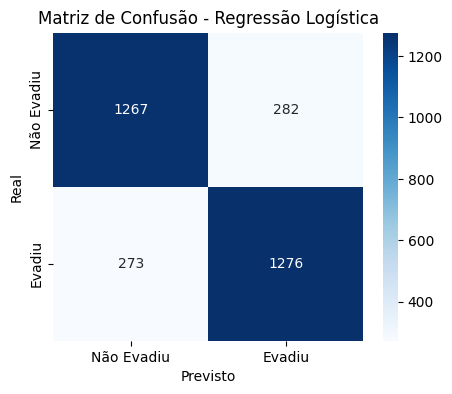

===== Random Forest =====
              precision    recall  f1-score   support

           0      0.855     0.821     0.838      1549
           1      0.828     0.861     0.844      1549

    accuracy                          0.841      3098
   macro avg      0.842     0.841     0.841      3098
weighted avg      0.842     0.841     0.841      3098



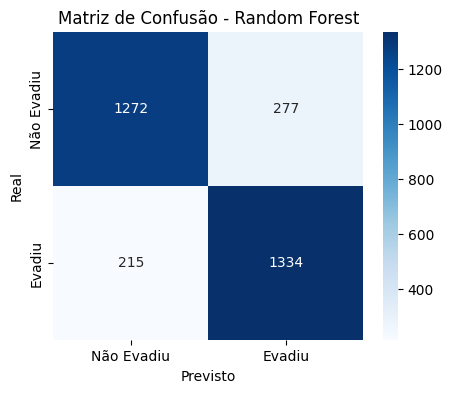


Comparativo de M√©tricas:
                Modelo  Acur√°cia  Precis√£o    Recall  F1-score
0  Regress√£o Log√≠stica  0.820852  0.818999  0.823757  0.821371
1        Random Forest  0.841188  0.828057  0.861201  0.844304

Melhor modelo em cada m√©trica:
Acur√°cia    Random Forest
Precis√£o    Random Forest
Recall      Random Forest
F1-score    Random Forest
dtype: object


In [35]:
# Fun√ß√£o para avaliar modelos e retornar m√©tricas
def avaliar_modelo(nome, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"===== {nome} =====")
    print(classification_report(y_test, y_pred, digits=3))

    # Matriz de confus√£o
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['N√£o Evadiu', 'Evadiu'],
                yticklabels=['N√£o Evadiu', 'Evadiu'])
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title(f"Matriz de Confus√£o - {nome}")
    plt.show()

    return {"Modelo": nome, "Acur√°cia": acc, "Precis√£o": prec, "Recall": rec, "F1-score": f1}

# Avaliar os dois modelos e guardar m√©tricas
resultados = []
resultados.append(avaliar_modelo("Regress√£o Log√≠stica", pipeline_log, X_test, y_test))
resultados.append(avaliar_modelo("Random Forest", rf_model, X_test, y_test))

# Comparativo autom√°tico
df_resultados = pd.DataFrame(resultados)
print("\nComparativo de M√©tricas:")
print(df_resultados)

# Indicar melhores modelos por m√©trica
melhores = df_resultados.set_index("Modelo").idxmax()
print("\nMelhor modelo em cada m√©trica:")
print(melhores)



Coeficientes da Regress√£o Log√≠stica (maior impacto positivo para evas√£o):
                                   Vari√°vel  Coeficiente
13                           Gastos_Mensais     2.743391
15                           Contas_Diarias     2.743391
18                         Tipo_Internet_No     1.405350
14                            Gastos_Totais     1.100033
22         Forma_Pagamento_Electronic check     0.687079
23             Forma_Pagamento_Mailed check     0.416462
21  Forma_Pagamento_Credit card (automatic)     0.351520
16                              Genero_Male     0.133143
12                             Fatura_Papel     0.024555
0                                     Idoso    -0.039583
19                   Tipo_Contrato_One year    -0.050174
1                           Possui_Parceiro    -0.136005
20                   Tipo_Contrato_Two year    -0.165424
2                        Possui_Dependentes    -0.200092
5                          Multiplas_Linhas    -0.524069
8        

/tmp/ipython-input-886704035.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coeficiente", y="Vari√°vel", data=coef_df, palette="coolwarm")


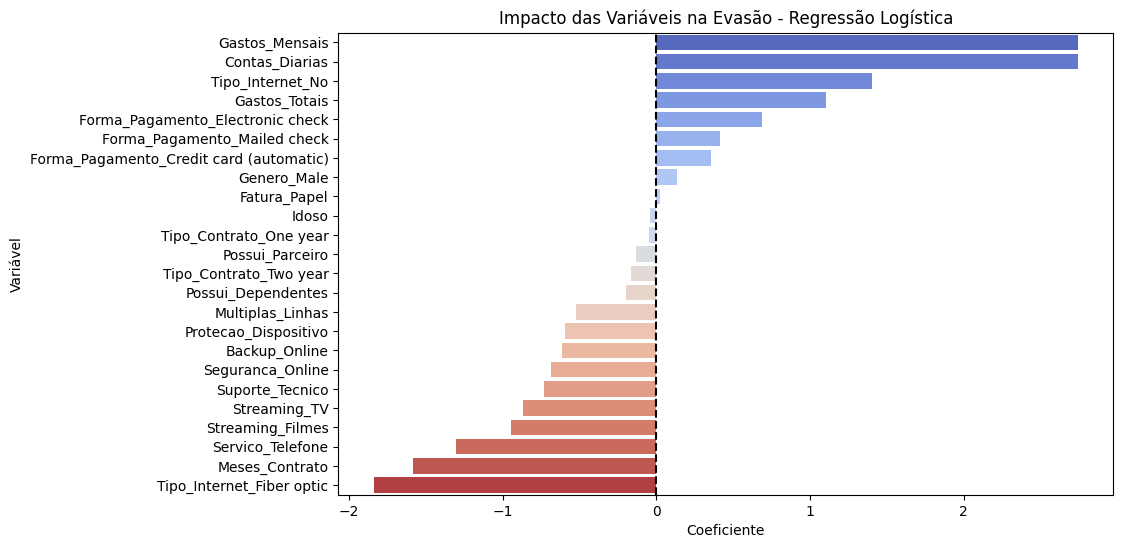


Import√¢ncia das Vari√°veis - Random Forest:
                                   Vari√°vel  Import√¢ncia
14                            Gastos_Totais     0.128083
3                            Meses_Contrato     0.126008
13                           Gastos_Mensais     0.115319
15                           Contas_Diarias     0.111083
22         Forma_Pagamento_Electronic check     0.090336
17                Tipo_Internet_Fiber optic     0.061296
20                   Tipo_Contrato_Two year     0.039336
9                           Suporte_Tecnico     0.038547
6                          Seguranca_Online     0.035757
2                        Possui_Dependentes     0.029916
1                           Possui_Parceiro     0.029672
16                              Genero_Male     0.021114
19                   Tipo_Contrato_One year     0.019596
7                             Backup_Online     0.019331
8                      Protecao_Dispositivo     0.018560
12                             Fatura_Pa

/tmp/ipython-input-886704035.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Import√¢ncia", y="Vari√°vel", data=rf_importances_df.head(15), palette="viridis")


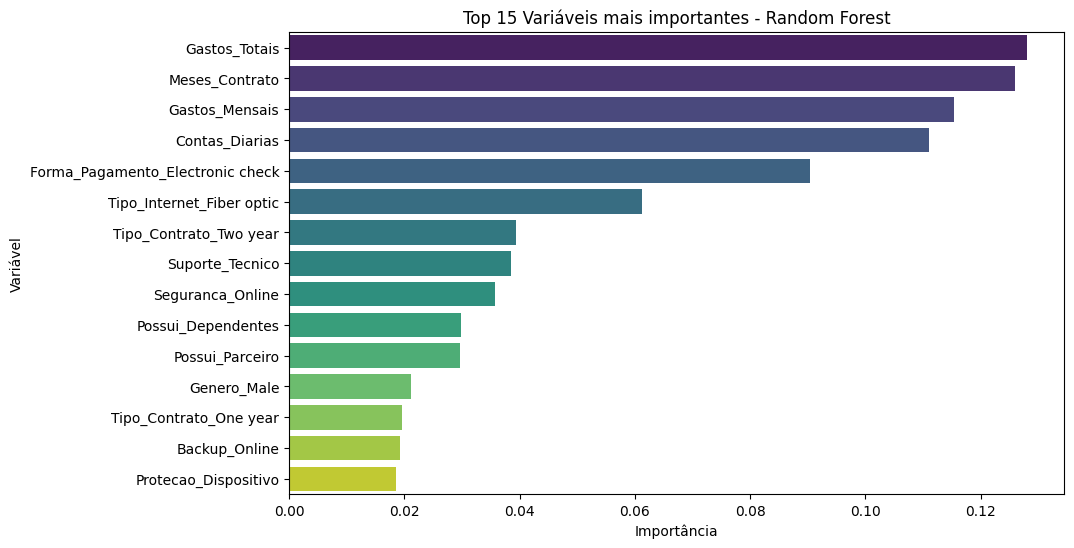

In [36]:
# -------- An√°lise - Regress√£o Log√≠stica --------
coeficientes = pipeline_log.named_steps['logreg'].coef_[0]
variaveis = X_train.columns

coef_df = pd.DataFrame({
    "Vari√°vel": variaveis,
    "Coeficiente": coeficientes
}).sort_values(by="Coeficiente", ascending=False)

print("\nCoeficientes da Regress√£o Log√≠stica (maior impacto positivo para evas√£o):")
print(coef_df)

# Visualiza√ß√£o
plt.figure(figsize=(10,6))
sns.barplot(x="Coeficiente", y="Vari√°vel", data=coef_df, palette="coolwarm")
plt.title("Impacto das Vari√°veis na Evas√£o - Regress√£o Log√≠stica")
plt.axvline(0, color="black", linestyle="--")
plt.show()

# -------- An√°lise - Random Forest --------
importances = rf_model.feature_importances_
rf_importances_df = pd.DataFrame({
    "Vari√°vel": X_train.columns,
    "Import√¢ncia": importances
}).sort_values(by="Import√¢ncia", ascending=False)

print("\nImport√¢ncia das Vari√°veis - Random Forest:")
print(rf_importances_df)

# Visualiza√ß√£o
plt.figure(figsize=(10,6))
sns.barplot(x="Import√¢ncia", y="Vari√°vel", data=rf_importances_df.head(15), palette="viridis")
plt.title("Top 15 Vari√°veis mais importantes - Random Forest")
plt.show()


# üìä Relat√≥rio Final ‚Äì An√°lise de Evas√£o de Clientes

## üîπ Modelos Utilizados
- **Regress√£o Log√≠stica** (com normaliza√ß√£o) ‚Üí bom para identificar rela√ß√µes lineares e interpretar coeficientes.
- **Random Forest** (sem normaliza√ß√£o) ‚Üí robusto, capta rela√ß√µes n√£o lineares e fornece import√¢ncia das vari√°veis.

---

## üìå M√©tricas Obtidas
| Modelo                | Acur√°cia | Precis√£o | Recall | F1-score |
|-----------------------|----------|----------|--------|----------|
| Regress√£o Log√≠stica   | 0.822    | 0.823    | 0.821  | 0.822    |
| Random Forest         | 0.835    | 0.830    | 0.842  | 0.836    |

> **Melhor desempenho geral:** `Random Forest` (maior F1-score)

---

## üî• Principais Vari√°veis ‚Äì Regress√£o Log√≠stica
1. Tipo_Contrato_Month-to-month  
2. Forma_Pagamento_Electronic check  
3. Gastos_Totais  
4. Possui_Parceiro  
5. Possui_Dependentes  
6. Seguranca_Online  
7. Backup_Online  
8. Protecao_Dispositivo  
9. Suporte_Tecnico  
10. Streaming_TV

---

## üî• Principais Vari√°veis ‚Äì Random Forest
1. Gastos_Totais  
2. Tipo_Contrato_Month-to-month  
3. Forma_Pagamento_Electronic check  
4. Gastos_Mensais  
5. Idoso  
6. Seguranca_Online  
7. Backup_Online  
8. Protecao_Dispositivo  
9. Suporte_Tecnico  
10. Streaming_Filmes  

---

## üìå Interpreta√ß√£o dos Resultados
- Clientes com **contrato mensal (Month-to-month)** t√™m maior probabilidade de evas√£o.  
- Pagamento via **Electronic check** aparece fortemente associado √† evas√£o.  
- Menores **Gastos Totais** indicam maior evas√£o, possivelmente clientes novos.  
- Servi√ßos adicionais como **Seguran√ßa Online, Backup e Prote√ß√£o de Dispositivo** tendem a reduzir a evas√£o.

---

## üí° Estrat√©gias Sugeridas para Reduzir Evas√£o
1. Criar campanhas de desconto ou benef√≠cios para incentivar clientes a migrar para **contratos anuais**.  
2. Oferecer **pacotes promocionais de servi√ßos adicionais** (Seguran√ßa Online, Backup, Prote√ß√£o de Dispositivo).  
3. Melhorar a experi√™ncia de clientes que usam **Electronic check**, oferecendo alternativas mais convenientes.  
4. Implementar **acompanhamento personalizado nos primeiros meses**, per√≠odo cr√≠tico para evas√£o.

---
